Best area for Homer Simpson based on Donut Shops.

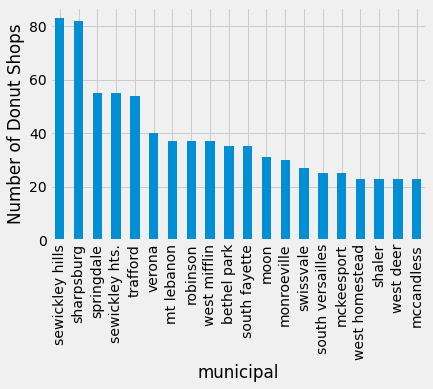

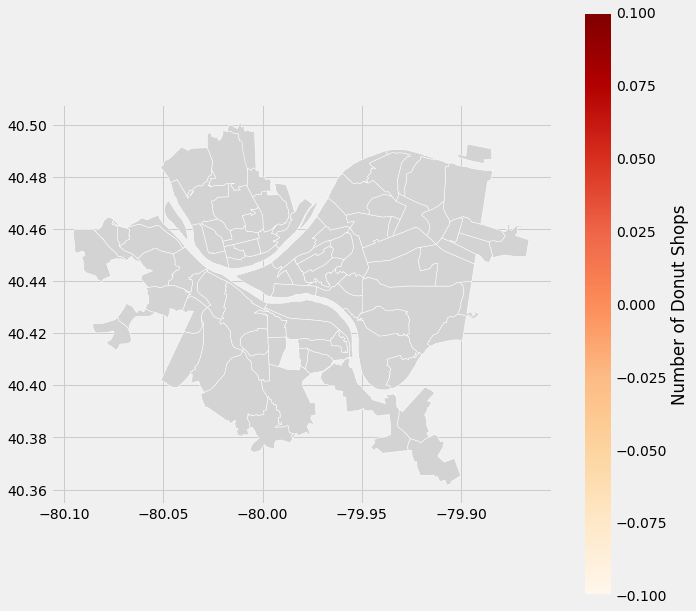

In [20]:
#Code cell
#A lot of the code will look the same as convenience_stores since we used the same dataset.
import pandas as pd
import numpy as np
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors

municipal_hash = {
    'pittsburgh-119': 'wall',
    'pittsburgh-104': 'sharpsburg',
    'pittsburgh-124': 'west view',
    'pittsburgh-129': 'wilkinsburg',
    'pittsburgh-113': 'thornburg',
    'pittsburgh-110': 'stowe',
    'pittsburgh-111': 'swissvale',
    'pittsburgh-115': 'turtle creek',
    'pittsburgh-112': 'tarentum',
    'pittsburgh-126': 'white oak',
    'pittsburgh-114': 'trafford',
    'pittsburgh-108': 'springdale',
    'pittsburgh-106': 'south park',
    'pittsburgh-102': 'sewickley hills',
    'pittsburgh-107': 'south versailles',
    'pittsburgh-120': 'west deer',
    'pittsburgh-123': 'west mifflin',
    'pittsburgh-109': 'springdale',
    'pittsburgh-116': 'upper st. clair',
    'pittsburgh-131': '0',
    'pittsburgh-101': 'sewickley hts.',
    'pittsburgh-128': 'wilkins',
    'pittsburgh-121': 'west elizabeth',
    'pittsburgh-105': 'south fayette',
    'pittsburgh-122': 'west homestead',
    'pittsburgh-127': 'whitehall',
    'pittsburgh-132': '0',
    'pittsburgh-118': 'versailles',
    'pittsburgh-103': 'shaler',
    'pittsburgh-117': 'verona',
    'pittsburgh-125': 'whitaker',
    'pittsburgh-130': 'wilmerding',
    'east pittsburgh': '0'
}
#Read the data, then dispose of the irrelevant data and make everything lowercase.
stores = pd.read_csv("data/stores.csv")
donut_stores = stores[['facility_name', 'municipal', 'x', 'y']]
donut_stores = donut_stores.dropna()
donut_stores['facility_name'] = donut_stores['facility_name'].apply(str.lower)
donut_stores['municipal'] = donut_stores['municipal'].apply(str.lower)

#I need to accept anything that has cafe OR donut, which is why the | is there.
donut_stores = donut_stores[donut_stores['facility_name'].str.contains('café|cafe|donut')].reset_index()

#Change all entries with codes to municipal names
index = 0
for row in donut_stores.iterrows():
    try:
        m = str(row[1].municipal)
        value = municipal_hash[m]
        donut_stores.at[index,'municipal'] = value
    except:
        continue
    finally:
        index = index + 1

#print(donut_stores) #Was using this to test if everything up to this point was working.

#Get values of each municipal's convenience store total and plot the top 20
municipal_count_df = pd.DataFrame(donut_stores.groupby('municipal')['municipal'].count())
municipal_count_df.columns = ['Number of Donut Shops']
municipal_count_df = municipal_count_df[1:]
municipal_count_df = municipal_count_df.sort_values(by='Number of Donut Shops', ascending=False)
plt.style.use('fivethirtyeight')
municipal_count_df.head(20).plot(kind='bar', legend=False)
plt.ylabel('Number of Donut Shops')
plt.show()

neighborhoods = gp.read_file("neighborhood_data/Neighborhoods_.shp")
neighborhoods['hood'] = neighborhoods['hood'].apply(str.lower)
municipal_count_df = municipal_count_df.reset_index()

# Display heat map of convenience stores
cvMaps = neighborhoods.merge(municipal_count_df, how='left', left_on='hood', right_on='municipal')
ax = cvMaps.plot(column='Number of Donut Shops', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Donut Shops"}, # label the legend
               figsize=(10, 10),         # set the size
               missing_kwds={"color": "lightgrey"}, # set disctricts with no data to gray
               )

CONCLUSION

Based on the number of donut shops, the best municipal is Sewickley Hills.